In [34]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'monospace','monospace':['Computer Modern Typewriter']})
rc('text', usetex=True)
import matplotlib
matplotlib.rcParams["text.latex.preamble"].append(r'\usepackage{xfrac}')
%matplotlib inline
import matplotlib.mlab as mlab
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import numpy as np
import pandas

import plotly.plotly as py

In [35]:
pediaDomains = pandas.read_csv('./Data/wp_used_domains.csv')
dataDomains = pandas.read_csv('./Data/wd_used_domains.csv')


topPediaDomains = pandas.read_csv('./Data/wp_used_tld.csv')
topDataDomains = pandas.read_csv('./Data/wd_used_tld.csv')

topLevelDomainsScatter = pandas.read_csv('./Data/clean_tld.csv')

domains = pandas.read_csv('./Data/matching_domain_count.csv', header=None)

## Ten most common matching domains between Wikidata items and Wikipedia  articles.

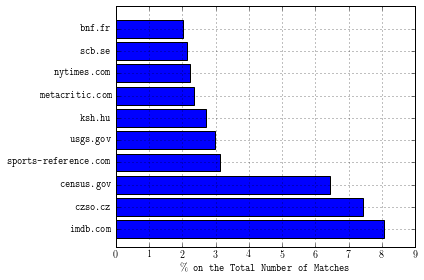

In [36]:
totalDomainsOccurrences = 0
for num in domains[1]:
    totalDomainsOccurrences += num

length = 10
width = 0.8
ax = plt.barh(range(length), np.asarray(domains[1][0:length] * 100 / totalDomainsOccurrences), width, align='center', color='b')
plt.grid(which='both')
plt.xlabel(r'$\%$ on the Total Number of Matches')
plt.ylim(-width)
plt.yticks(range(length), domains[0][0:length])
plt.tight_layout()
plt.savefig("./Figures/TopDomains.pdf", format="pdf")
plt.show()

## Top used domains in Wikidata.

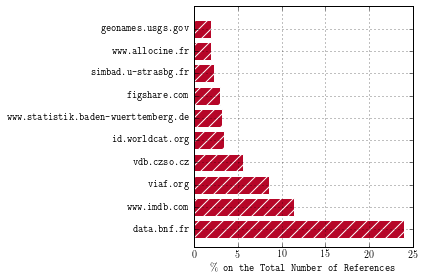

In [37]:
totalDataOccurrences = 0
for num in dataDomains['refHost']:
    totalDataOccurrences += num

length = 10
width = 0.8
ax = plt.barh(range(length), np.asarray(dataDomains['refHost'][0:length] * 100 / totalDataOccurrences), width, align='center', color='#b60628', edgecolor='white', hatch="//")
plt.grid(which='both')
plt.xlabel(r'$\%$ on the Total Number of References')
plt.ylim(-width)
plt.yticks(range(length), dataDomains['index'][0:length])
plt.tight_layout()
plt.savefig("./Figures/TopDomainsData.pdf", format="pdf")
plt.show()

## Top used domains in Wikipedia.

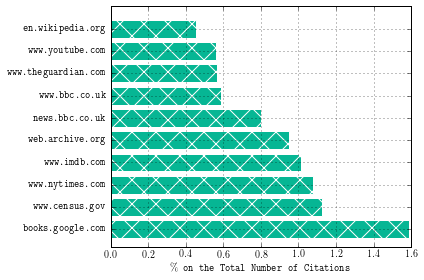

In [38]:
totalPediaOccurrences = 0
for num in pediaDomains['refHost']:
    totalPediaOccurrences += num

length = 10
width = 0.8
ax = plt.barh(np.arange(length), np.asarray(pediaDomains['refHost'][0:length] * 100 / totalPediaOccurrences), width, align='center', color='#06b694', edgecolor='white', hatch='x')
plt.grid(which='both')
plt.xlabel(r'$\%$ on the Total Number of Citations')
plt.ylim(-width)
plt.yticks(np.arange(length), pediaDomains['index'][0:length])
plt.tight_layout()
plt.savefig("./Figures/TopDomainsPedia.pdf", format="pdf")

plt.show()

## Matching domains across both Wikipedia and Wikidata.

## Wikidata top-level domains -- compare to Wikipedia top-level domains
We check whether Wikidata serves its multilingual purpose.

<IPython.core.display.Javascript object>


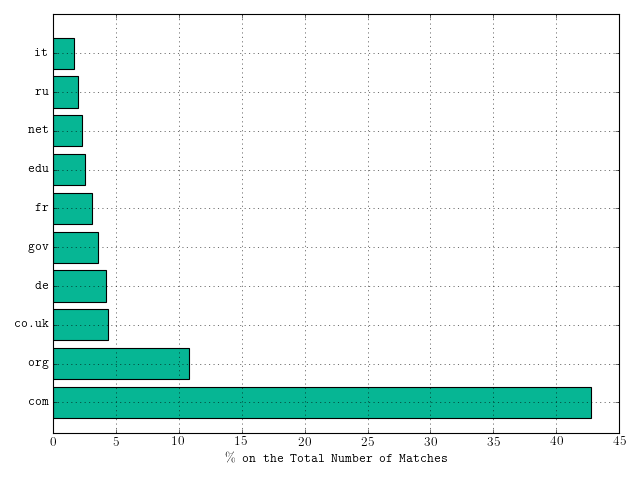

In [21]:
totalPediaOccurrences = 0
for num in topPediaDomains['citeTld']:
    totalPediaOccurrences += num

length = 10
width = 0.8
ax = plt.barh(range(length), np.asarray(topPediaDomains['citeTld'][0:length] * 100 / totalPediaOccurrences), width, align='center', color='#06b694')
plt.grid(which='both')
plt.xlabel(r'$\%$ on the Total Number of Matches')
plt.ylim(-width)
plt.yticks(range(length), topPediaDomains['index'][0:length])
plt.tight_layout()
plt.savefig("./Figures/TopLevelDomainsPedia.pdf", format="pdf")
plt.show()

<IPython.core.display.Javascript object>


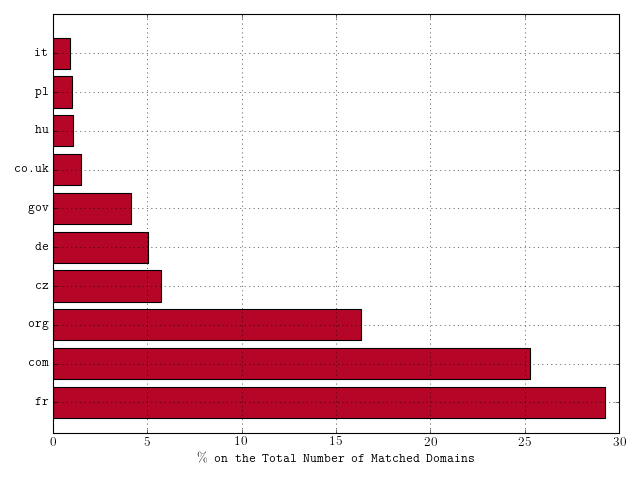

In [46]:
totalDataOccurrences = 0
for num in topDataDomains['refTld']:
    totalDataOccurrences += num

length = 10
width = 0.8
ax1 = plt.barh(range(length), np.asarray(topDataDomains['refTld'][0:length] * 100 / totalDataOccurrences), width, align='center', color='#b60628')

plt.grid(which='both')
plt.xlabel(r'$\%$ on the Total Number of Matches')
plt.ylim(-width)
plt.yticks(np.arange(length), topDataDomains['index'][0:length])
plt.tight_layout()
plt.savefig("./Figures/TopLevelDomainsData.pdf", format="pdf")
plt.show()

<IPython.core.display.Javascript object>


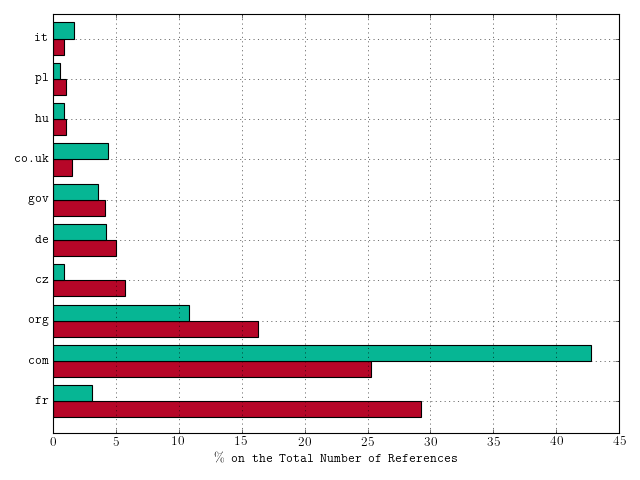

In [36]:
tempPediaDomains = np.zeros(length)
for i in range(0, len(topDataDomains['index'][0:length])):
    for j in range(0, len(topPediaDomains['citeTld'])):
        if topDataDomains['index'][i] == topPediaDomains['index'][j]:
            tempPediaDomains[i] = topPediaDomains['citeTld'][j]
    
length = 10
width = 0.4
ax1 = plt.barh(np.arange(length), np.asarray(topDataDomains['refTld'][0:length] * 100 / totalDataOccurrences), width, color='#b60628')
ax2 = plt.barh(np.arange(length) + width, tempPediaDomains * 100 / totalPediaOccurrences, width, color='#06b694')

plt.grid(which='both')
plt.ylim(-width)
plt.yticks(np.arange(length) + width, topDataDomains['index'][0:length])
plt.tight_layout()
plt.savefig("./Figures/TopLevelDomainsComparison.pdf", format="pdf")
plt.show()


## Scatter Plot of Top-Level Domains

<IPython.core.display.Javascript object>


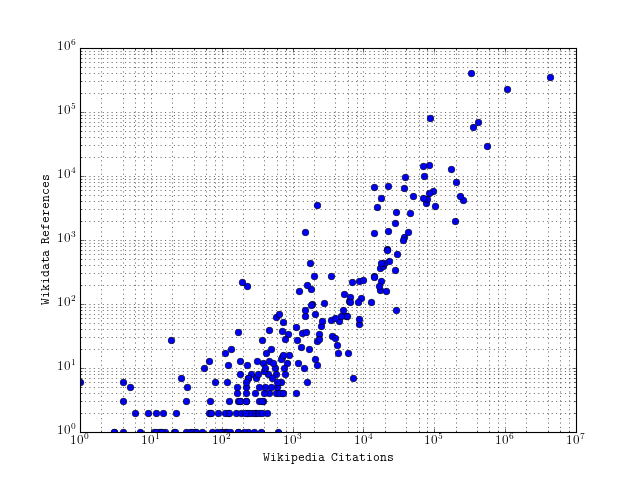

In [25]:
# plt.plot(topLevelDomainsScatter['citeTld_pc'], topLevelDomainsScatter['refTld_pc'], "o")
# plt.plot(np.log(topLevelDomainsScatter['citeTld']), np.log(topLevelDomainsScatter['refTld']), "o")
plt.plot(topLevelDomainsScatter['citeTld'], topLevelDomainsScatter['refTld'], "o", color='b')
plt.grid(which='both')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wikipedia Citations')
plt.ylabel('Wikidata References')
plt.savefig("./Figures/ScatterPlot.pdf", format="pdf")
plt.show()

## Check the type distribution across Wikidata, items in our dataset and items with matching domains.

In [44]:
dataTypes = pandas.read_csv('./Data/item_type_all_wd.csv')
domainTypes = pandas.read_csv('./Data/item_types_matchdom.csv')
itemTypes = pandas.read_csv('./Data/item_types.csv')

dataTypes.sort_values(by='shareType', ascending=False, inplace=True)
dataTypes.reset_index(drop=True, inplace=True)

tempDomainTypes = np.zeros(len(dataTypes))
tempItemTypes = np.zeros(len(dataTypes))
for i in range(0, len(dataTypes)):
    for j in range(0, len(domainTypes)):
        if dataTypes['type'][i] == domainTypes['type'][j]:
            tempDomainTypes[i] = domainTypes['shareType'][j]
    for j in range(0, len(itemTypes)):
        if dataTypes['type'][i] == itemTypes['type'][j]:
            tempItemTypes[i] = itemTypes['shareType'][j]

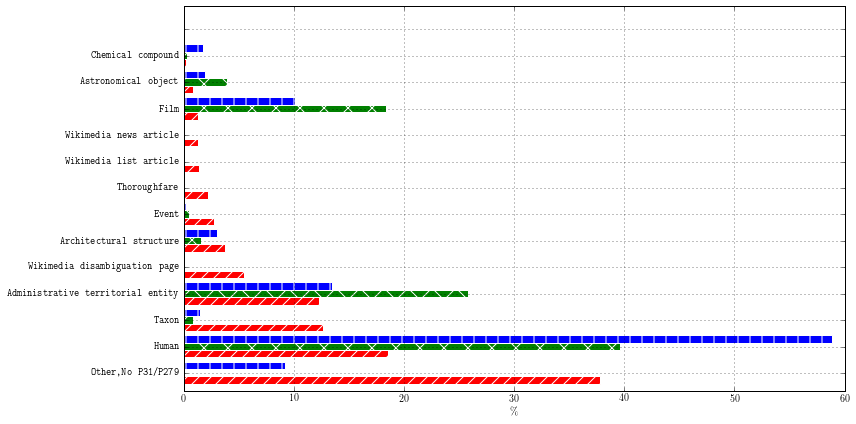

In [64]:
width = 0.28

plt.figure(figsize=(12, 6))
ax1 = plt.barh(np.arange(0, len(dataTypes) - 1) - width, np.asarray(dataTypes['shareType'][1:len(dataTypes)]), width, color='r', edgecolor='white', hatch='//')
ax2 = plt.barh(np.arange(0, len(dataTypes) - 1), tempDomainTypes[1:len(dataTypes)], width, color='g', edgecolor='white', hatch='x')
ax3 = plt.barh(np.arange(0, len(dataTypes) - 1) + width, tempItemTypes[1:len(dataTypes)], width, color='b', edgecolor='white', hatch='|')

plt.grid(which='both')
plt.xlabel(r'$\%$')
plt.ylim(-2 * width)
plt.yticks(np.arange(0, len(dataTypes)) + 0.45 * width, dataTypes['type'][1:len(dataTypes)])
plt.tight_layout()
plt.savefig("./Figures/MatchedTypes.pdf", format="pdf")
plt.show()

## Single web page matches between Wikidata items and corresponding Wikipedia articles, by Wikipedia language version.

In [42]:
referencesLanguagesSingle = pandas.read_csv('./Data/matching_refs_unique_lang_single_ref_count.csv', header=None)
referencesLanguages = pandas.read_csv('./Data/matching_refs_unique_lang_count.csv', header=None)


referencesLanguagesSingle.sort_values(by=1, ascending=False, inplace=True)
referencesLanguagesSingle.reset_index(drop=True, inplace=True)

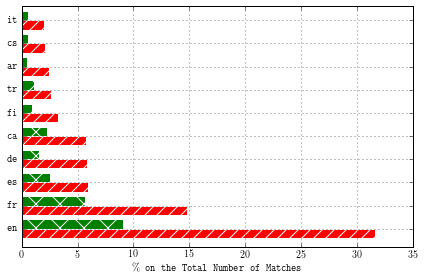

In [43]:
totalReferencesSingleOccurrences = 0
for num in referencesLanguagesSingle[1]:
    totalReferencesSingleOccurrences += num
    
totalReferencesOccurrences = 0
for num in referencesLanguages[1]:
    totalReferencesOccurrences += num

length = 10
tempReferencesLanguages = np.zeros(length)
for i in range(0, len(referencesLanguagesSingle[1][0:length])):
    for j in range(0, len(referencesLanguages[1])):
        if referencesLanguages[0][j] == referencesLanguagesSingle[0][i]:

            tempReferencesLanguages[i] = referencesLanguages[1][j]



width = 0.4
ax1 = plt.barh(np.arange(length), np.asarray(referencesLanguagesSingle[1][0:length] * 100 / totalReferencesSingleOccurrences), width, color='r', edgecolor='white', hatch='//')
ax2 = plt.barh(np.arange(length) + width, tempReferencesLanguages * 100 / totalReferencesOccurrences, width, color='g', edgecolor='white', hatch='x')

plt.grid(which='both')
plt.xlabel(r'$\%$ on the Total Number of Matches')
plt.ylim(-width)
plt.yticks(np.arange(length) + width, referencesLanguagesSingle[0][0:length])
plt.tight_layout()
plt.savefig("./Figures/ReferencesLanguages.pdf", format="pdf")
plt.show()

## Domain matches between Wikidata items and corresponding Wikipedia articles, by Wikipedia language version.

In [40]:
domainsLanguagesSingle = pandas.read_csv('./Data/matching_domain_lang_single_ref_count.csv', header=None)
domainsLanguages = pandas.read_csv('./Data/matching_domain_unique_lang_count.csv', header=None)


domainsLanguagesSingle.sort_values(by=1, ascending=False, inplace=True)
domainsLanguagesSingle.reset_index(drop=True, inplace=True)

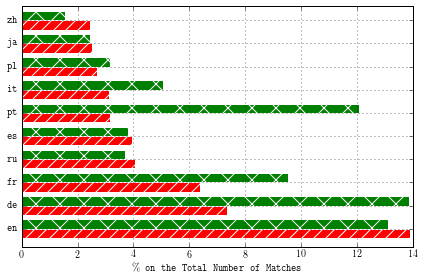

In [41]:
totalDomainsSingleOccurrences = 0
for num in domainsLanguagesSingle[1]:
    totalDomainsSingleOccurrences += num
    
totalDomainsOccurrences = 0
for num in domainsLanguages[1]:
    totalDomainsOccurrences += num

length = 10
tempDomainsLanguages = np.zeros(length)
for i in range(0, len(domainsLanguagesSingle[1][0:length])):
    for j in range(0, len(domainsLanguages[1])):
        if domainsLanguages[0][j] == domainsLanguagesSingle[0][i]:

            tempDomainsLanguages[i] = domainsLanguages[1][j]



width = 0.4
ax1 = plt.barh(np.arange(length), np.asarray(domainsLanguagesSingle[1][0:length] * 100 / totalDomainsSingleOccurrences), width, color='r', edgecolor='white', hatch='//')
ax2 = plt.barh(np.arange(length) + width, tempDomainsLanguages * 100 / totalDomainsOccurrences, width, color='g', edgecolor='white', hatch='x')

plt.grid(which='both')
plt.xlabel(r'$\%$ on the Total Number of Matches')
plt.ylim(-width)
plt.yticks(np.arange(length) + width, domainsLanguagesSingle[0][0:length])
plt.tight_layout()
plt.savefig("./Figures/DomainsLanguages.pdf", format="pdf")
plt.show()